# Introduction

The healthcare industry is a complex and vital sector, where understanding patterns in healthcare expenditures can provide valuable insights for healthcare providers, insurers, and policymakers. This project aims to analyze public Medicare claims data to identify trends, patterns, and disparities in healthcare expenditures across different demographics and diagnosis-related groups (DRGs). By leveraging the 2008 Medicare Inpatient Claims Public Use File (PUF), we will explore the distribution of healthcare costs within a limited set of DRGs that have a significant number of claims and low suppression rates, as per the dataset's limitations.

Our analysis will primarily focus on understanding the variations in healthcare expenditures across factors such as age, gender, region, and DRGs. We will also investigate the relationships between healthcare expenditures and other relevant variables, such as length of stay. To communicate our findings effectively, we will employ various data visualization techniques using Python libraries such as Matplotlib and Seaborn.

It is important to note that the dataset we will be using has certain limitations due to data suppression, which aims to protect beneficiary confidentiality. As a result, our analysis will be restricted to the DRGs with a significant number of claims in the PUF and a small rate of suppression. This constraint should be taken into account when interpreting the results of our analysis.

In the following sections, we will detail the steps taken in data preparation, exploratory data analysis, data visualization, and interpretation of our findings. The insights generated from this project have the potential to inform healthcare decision-making and contribute to more efficient, equitable, and cost-effective healthcare systems.

# Data Preparation

## Load the dataset and necessary Python libraries 

In [78]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
filepath = '/home/kevin/Python Projects/Portfolio/insight-fabricator/Medicare PUF 2008/2008_BSA_Inpatient_Claims_PUF.csv'
data = pd.read_csv(filepath)

## Inspect the dataset for missing values, outliers, or inconsistencies

In this section, we will examine key variables in the dataset to identify any outliers or inconsistencies that may impact the accuracy of our analysis. We will visually inspect each variable using appropriate graphs and validate their values based on the expected categories or ranges.  Some variables are transformed or renamed for clarity or ease of use.

ID Variable (IP_CLM_ID): We will remove the index since it is not necessary for our aggregate analysis and will not be used in any data merging or tracking operations.

Gender Variable (BENE_SEX_IDENT_CD): Next, we will verify that the gender variable contains only valid categories male(1) or female(2). We will also create a bar chart to display the distribution of claims by gender, allowing us to observe any significant imbalances.

Age Variable (BENE_AGE_CAT_CD): We will first inspect the age variable to ensure that it only contains valid categories (1 to 6).  To visualize the distribution of age categories, we will create a bar chart showing the number of claims for each age group.

Base DRG Variable: We will check that the Base DRG variable has valid codes ranging from 1 to 311. To visualize the distribution of DRG codes in the dataset, we will create a bar chart displaying the top 10 most frequent DRG codes. This allows us to focus on the most common DRG codes in the dataset and gain insight into their prevalence.

ICD-9 Primary Procedure Code Variable (IP_CLM_ICD9_PRCDR_CD): We will ensure that the ICD-9 primary procedure code variable contains valid codes (00 to 99) and identify any missing values. To visualize the distribution of DRG codes in the dataset, we will create a bar chart displaying the top 10 most frequent ICD-9 codes. This allows us to focus on the most common DRG codes in the dataset and gain insight into their prevalence.

Length of Stay Variable (IP_CLM_DAYS_CD): We will validate that the length of stay variable contains valid categories (1 to 4). To visualize the distribution of length of stay categories, we will create a bar chart displaying the number of claims for each category.

Amount Variables (IP_DRG_QUINT_PMT_AVG and IP_DRG_QUINT_PMT_CD): We will check that the IP_DRG_QUINT_PMT_CD variable contains valid categories (1 to 5) and verify the values in the IP_DRG_QUINT_PMT_AVG variable. To visualize the relationship between IP_DRG_QUINT_PMT_CD and IP_DRG_QUINT_PMT_AVG, we will create a violin plot for the top 3 most frequent DRG codes.

By closely examining these variables and their distributions, we can ensure the data's accuracy and reliability before proceeding with further analysis. This step is crucial in maintaining the integrity of our research findings and understanding the limitations of our dataset.


### Rename Columns

In [79]:
# Define the new column names
new_columns = {
    'IP_CLM_ID': 'id',
    'BENE_SEX_IDENT_CD': 'gender',
    'BENE_AGE_CAT_CD': 'age',
    'IP_CLM_BASE_DRG_CD': 'base_drg',
    'IP_CLM_ICD9_PRCDR_CD': 'icd9',
    'IP_CLM_DAYS_CD': 'length',
    'IP_DRG_QUINT_PMT_AVG': 'quint_avg_payment',
    'IP_DRG_QUINT_PMT_CD': 'quintile'
}

# Rename the columns
data = data.rename(columns=new_columns)
print(data.head())

                    id  gender  age  base_drg  icd9  length  \
0  IP-000022CE4125DBE7       2    4         3  31.0       4   
1  IP-0000417F50942D90       2    5       199   NaN       2   
2  IP-0000865F5457AC0E       1    1       119  54.0       4   
3  IP-00009789630AF474       2    2       128   NaN       2   
4  IP-0000C9D229B79D36       2    2       236  70.0       1   

   quint_avg_payment  quintile  
0              86240         4  
1               3447         2  
2              34878         5  
3               3007         2  
4               3352         2  


### Drop ID variable

In [80]:
# Drop id column
data.drop('id', axis=1, inplace=True)

### Inspect Age Variable

6    122287
1    116080
5     94759
4     91487
3     86205
2     77597
Name: age, dtype: int64
85 and above    122287
Under 65        116080
80-84            94759
75-79            91487
70-74            86205
65-69            77597
Name: age, dtype: int64


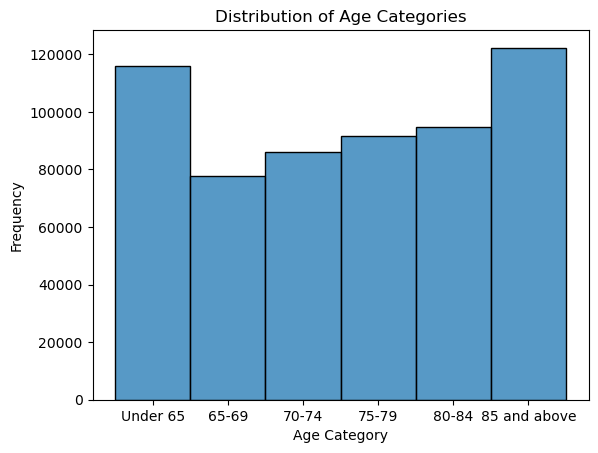

In [81]:
# Check the distribution of age categories (1 to 6)
print(data['age'].value_counts())


# Transform age categories
age_dict = {1: 'Under 65',
            2: '65-69',
            3: '70-74',
            4: '75-79',
            5: '80-84',
            6: '85 and above'}
data['age'] = data['age'].replace(age_dict)
data['age'] = pd.Categorical(data['age'], ['Under 65','65-69','70-74','75-79','80-84','85 and above'])
print(data['age'].value_counts())

# Create a bar chart to display the distribution of age categories
sns.histplot(data['age'], kde=False)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Frequency')

# Display plot
plt.show()


### Inspect Gender Variable

2    330198
1    258217
Name: gender, dtype: int64


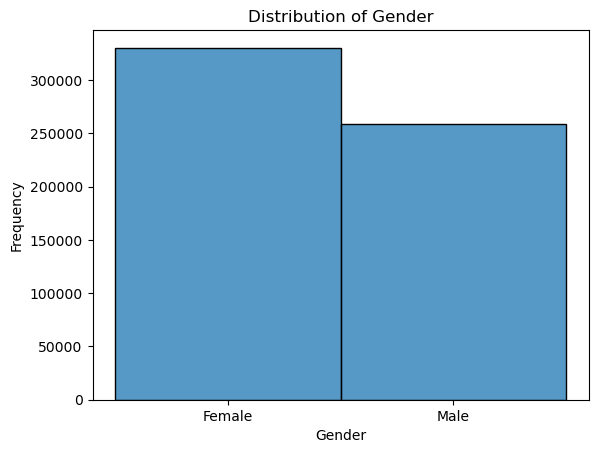

In [82]:
#Check for valid categories (male or female)
print(data['gender'].value_counts())

#Transform Gender Categories
gender_dict = {1: 'Male',
               2: 'Female'}
data['gender'] = data['gender'].replace(gender_dict)

#Visualization: Create a bar chart to display the distribution of gender.
sns.histplot(data['gender'], kde=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Display plot
plt.show()

### Inspect Base DRG variable

All Base DRG codes are in range
OrderedDict([(97, 29374), (64, 24317), (148, 23111), (63, 22865), (279, 21248), (272, 17904), (298, 17219), (128, 15226), (104, 14695), (215, 14127)])


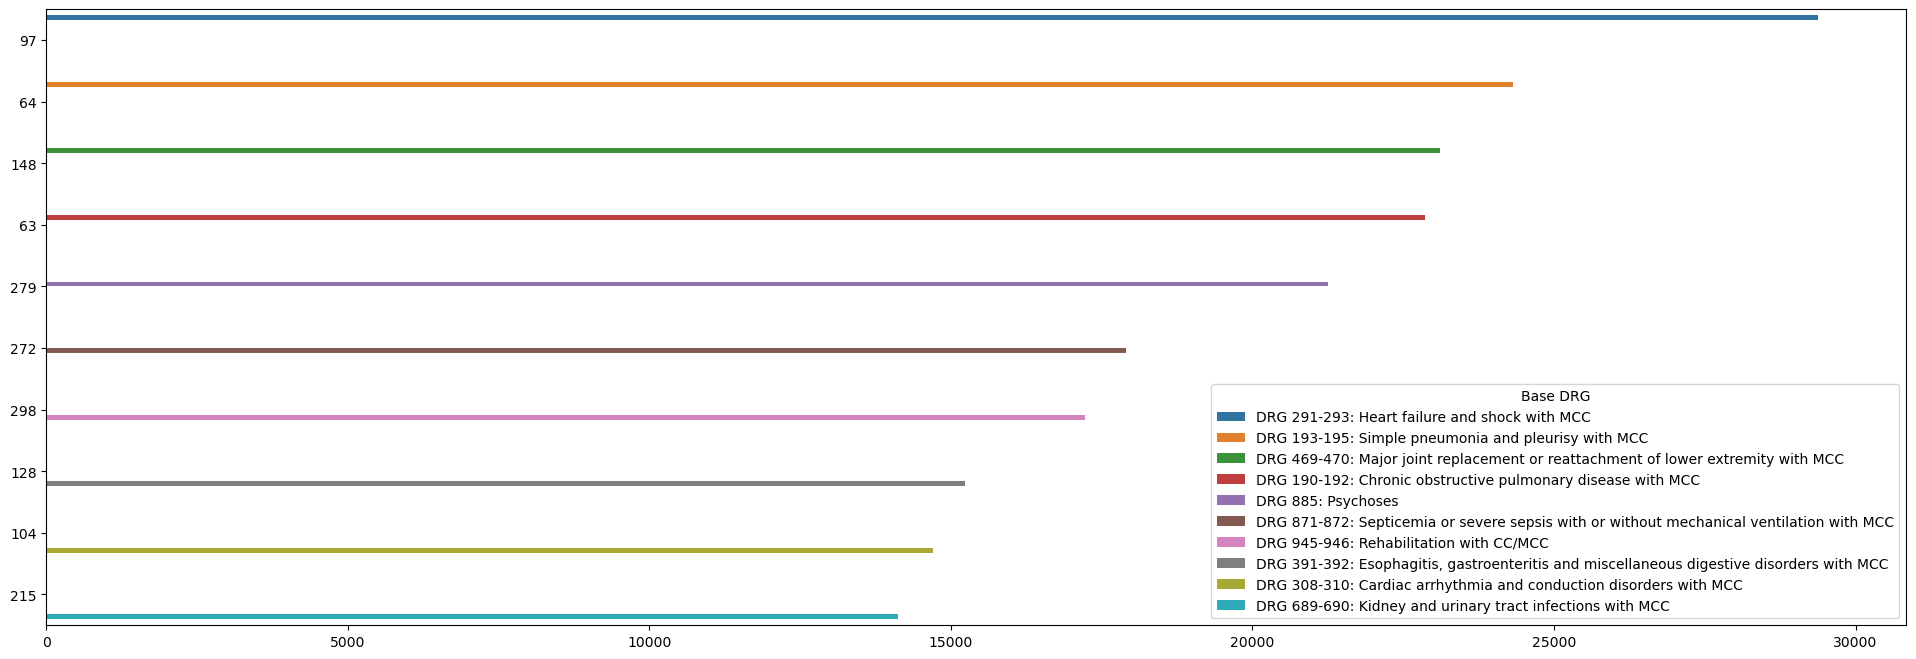

In [83]:
# Check for valid codes (1 to 311)

if data['base_drg'].min() == 1 and data['base_drg'].max() == 311:
    print('All Base DRG codes are in range')

# Get the top 10 Base DRG codes by frequency count
top_drg = dict(data['base_drg'].value_counts().sort_values(ascending=False).head(10))
sorted_top_drg = dict(sorted(top_drg.items(), key=lambda x: x[1], reverse=True))
ordered_top_drg = collections.OrderedDict(sorted_top_drg.items())
print(ordered_top_drg)

# Create a dictionary mapping each Base DRG to its corresponding descriptor
drg_descriptors = {
    97: 'DRG 291-293: Heart failure and shock with MCC',
    64: 'DRG 193-195: Simple pneumonia and pleurisy with MCC',
    148: 'DRG 469-470: Major joint replacement or reattachment of lower extremity with MCC',
    63: 'DRG 190-192: Chronic obstructive pulmonary disease with MCC',
    279: 'DRG 885: Psychoses',
    272: 'DRG 871-872: Septicemia or severe sepsis with or without mechanical ventilation with MCC',
    298: 'DRG 945-946: Rehabilitation with CC/MCC',
    128: 'DRG 391-392: Esophagitis, gastroenteritis and miscellaneous digestive disorders with MCC',
    104: 'DRG 308-310: Cardiac arrhythmia and conduction disorders with MCC',
    215: 'DRG 689-690: Kidney and urinary tract infections with MCC'
}

# Create a horizontal barplot of DRG codes and their frequencies
fig, ax = plt.subplots(figsize=(24,8))
sns.barplot(x=list(ordered_top_drg.values()), y=list(ordered_top_drg.keys()), order=list(ordered_top_drg.keys()), 
            ax=ax, orient='h', hue=[drg_descriptors.get(i) for i in ordered_top_drg.keys()])
#Chart Legend
ax.legend(title='Base DRG', loc='lower right',ncol=1)
plt.show()

### Inspect ICD-9 primary procedure code variable

Missing Data: 46.9984619698682 %
All ICD9 codes are in range


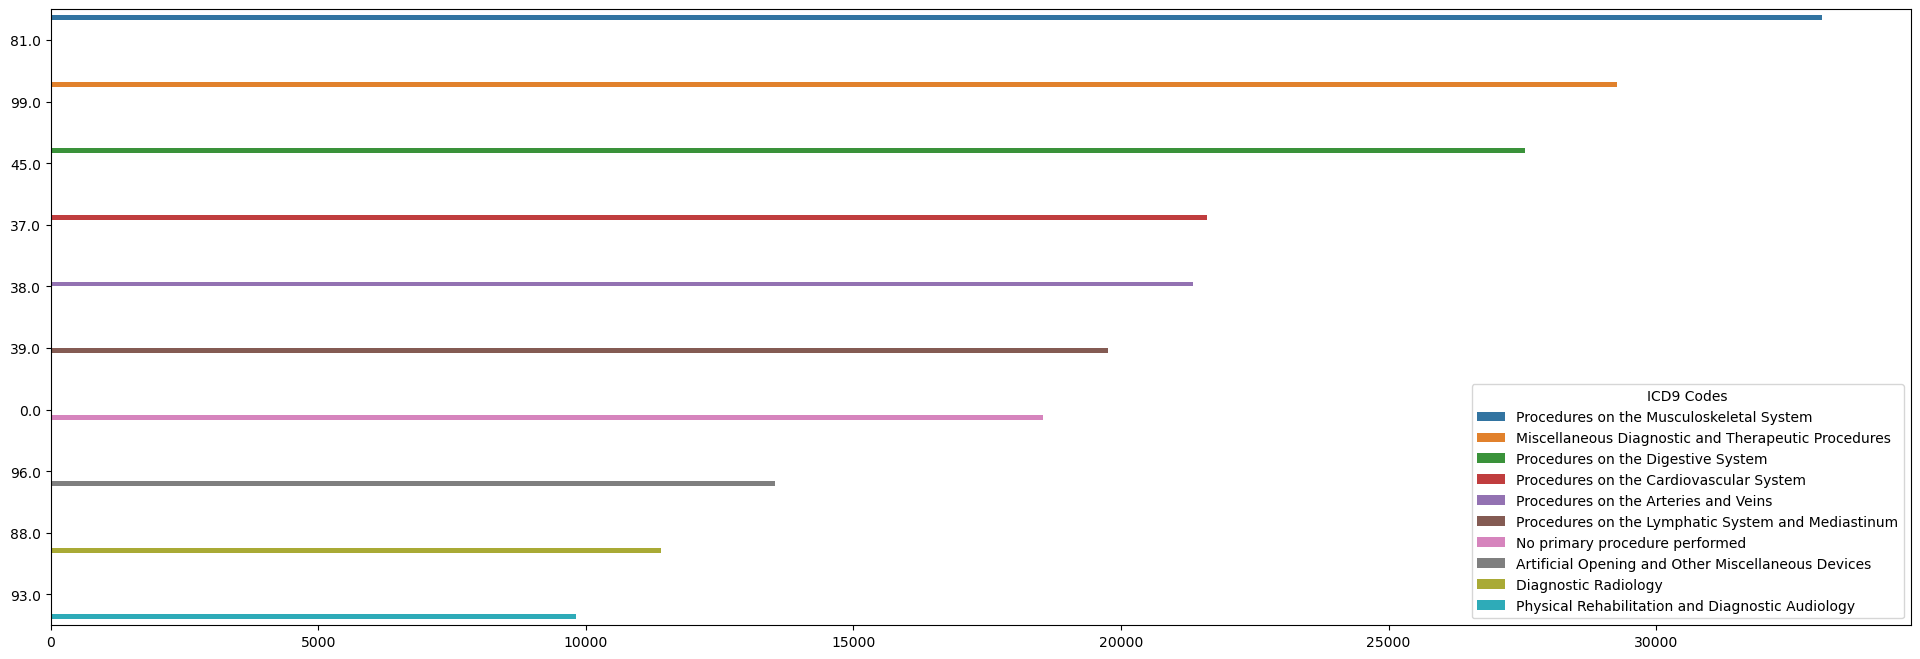

In [84]:
# Check for valid codes (00 to 99) and missing values
# Missing Entry Count, according to documentation, 47% of are missing.
print('Missing Data:',data['icd9'].isnull().sum() / data.shape[0] * 100,'%')

# Check for valid codes (0 to 99)
if data['icd9'].min() == 0 and data['icd9'].max() == 99:
    print('All ICD9 codes are in range')
    
# Get the top 10 ICD9 codes by frequency count
top_icd9 = dict(data['icd9'].value_counts().sort_values(ascending=False).head(10))
sorted_top_icd9 = dict(sorted(top_icd9.items(), key=lambda x: x[1], reverse=True))
ordered_top_icd9 = collections.OrderedDict(sorted_top_icd9.items())

# Create a dictionary mapping each ICD to its corresponding descriptor
icd_descriptors = {
    81: 'Procedures on the Musculoskeletal System',
    99: 'Miscellaneous Diagnostic and Therapeutic Procedures',
    45: 'Procedures on the Digestive System',
    37: 'Procedures on the Cardiovascular System',
    38: 'Procedures on the Arteries and Veins',
    39: 'Procedures on the Lymphatic System and Mediastinum',
    0: 'No primary procedure performed',
    96: 'Artificial Opening and Other Miscellaneous Devices',
    88: 'Diagnostic Radiology',
    93: 'Physical Rehabilitation and Diagnostic Audiology',
}

# Create a horizontal barplot of ICD codes and their frequencies
fig, ax = plt.subplots(figsize=(24,8))
sns.barplot(x=list(ordered_top_icd9.values()), y=list(ordered_top_icd9.keys()), 
            order=list(ordered_top_icd9.keys()), ax=ax, orient='h', 
            hue=[icd_descriptors.get(i) for i in ordered_top_icd9.keys()])
#Chart Legend
ax.legend(title='ICD9 Codes', loc='lower right',ncol=1)

plt.show()

### Inspect length of stay variable

2    261419
4    128898
3    122073
1     76025
Name: length, dtype: int64


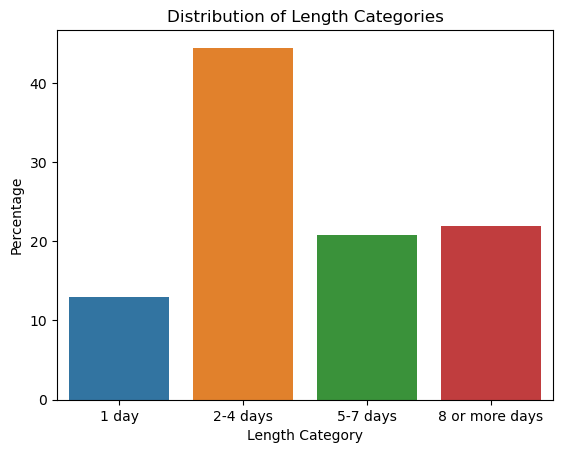

In [85]:
# Check the distribution of length categories (1 to 4)
print(data['length'].value_counts())

# Transform age categories
length_dict = {1: '1 day',
            2: '2-4 days',
            3: '5-7 days',
            4: '8 or more days'}
data['length'] = data['length'].replace(length_dict)
data['length'] = pd.Categorical(data['length'], ['1 day','2-4 days','5-7 days','8 or more days'])

# Calculate the percentage of observations in each length category
length_perc = (data['length'].value_counts(normalize=True) * 100).rename('percentage').reset_index()

# Create a bar chart to display the distribution of length categories
sns.barplot(x='index', y='percentage', data=length_perc)
plt.title('Distribution of Length Categories')
plt.xlabel('Length Category')
plt.ylabel('Percentage')

# Display plot
plt.show()

### Inspect claims amount variables

The data contains quintile values ranging from 1 to 5
count    588415.000000
mean       9312.621422
std       10482.707298
min           0.000000
25%        4008.000000
50%        6352.000000
75%       10760.000000
max      329467.000000
Name: quint_avg_payment, dtype: float64


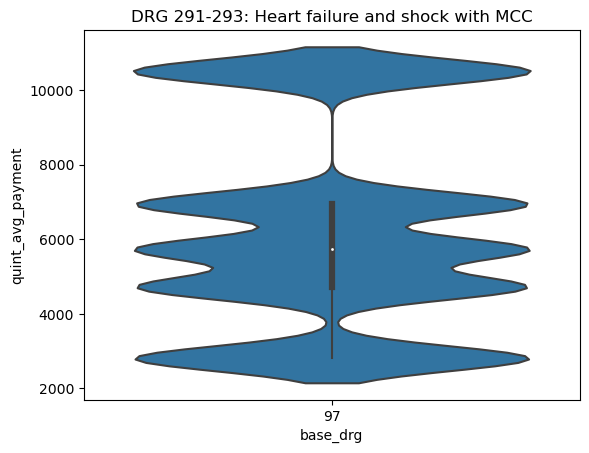

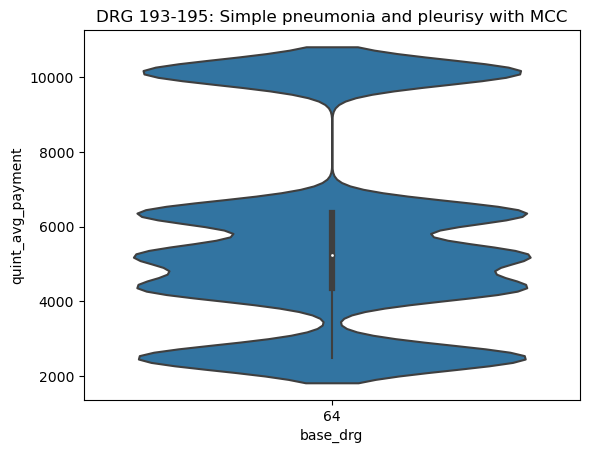

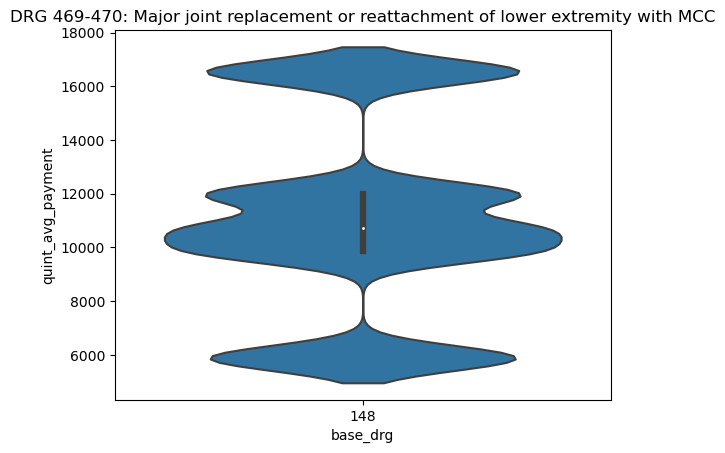

In [86]:
# Check for valid categories (1 to 5) for IP_DRG_QUINT_PMT_CD
if (data['quintile'].unique() >= 1).all() and (data['quintile'].unique() <= 5).all():
    print('The data contains quintile values ranging from 1 to 5')
    
#Check for valid values in IP_DRG_QUINT_PMT_AVG
print(data['quint_avg_payment'].describe())

# Create a subset of the data for the top 3 DRGs
top_drgs = [97, 64, 148]
subset = data[data['base_drg'].isin(top_drgs)]

# Create a dictionary to map the DRG codes to their descriptors
drg_descriptors = {
    97: 'DRG 291-293: Heart failure and shock with MCC',
    64: 'DRG 193-195: Simple pneumonia and pleurisy with MCC',
    148: 'DRG 469-470: Major joint replacement or reattachment of lower extremity with MCC'
}

# Create a violin plot for each DRG
for drg in top_drgs:
    subset_drg = subset[subset['base_drg'] == drg]
    sns.violinplot(x='base_drg', y='quint_avg_payment', data=subset_drg)
    plt.title(drg_descriptors[drg])
    plt.show()

## Data Filtering
Based on the dataset documentation, the rate of suppression of claims is much higher for DRGs that are uncommon among Medicare beneficiaries. To ensure that the statistical results derived from the dataset are reliable, we will focus on the 69 DRGs with 2,000 or more claims in the initial 5% sample. On average, less than 10% of claims from these DRGs have been suppressed. This reduces the number of observations by approximately 20%.

In [87]:
# Drop DRGs with less than 2000 claims
drg_counts = data['base_drg'].value_counts()
drg_filter = drg_counts[drg_counts >= 2000].index
data = data[data['base_drg'].isin(drg_filter)]

# Show filtered results
original_data = pd.read_csv(filepath)
print(f"Original data shape: {original_data.shape}")
print(f"Filtered data shape: {data.shape}")

Original data shape: (588415, 8)
Filtered data shape: (471431, 7)


# Exploratory Data Analysis

## Examine the distribution of healthcare expenditures across the selected DRGs.

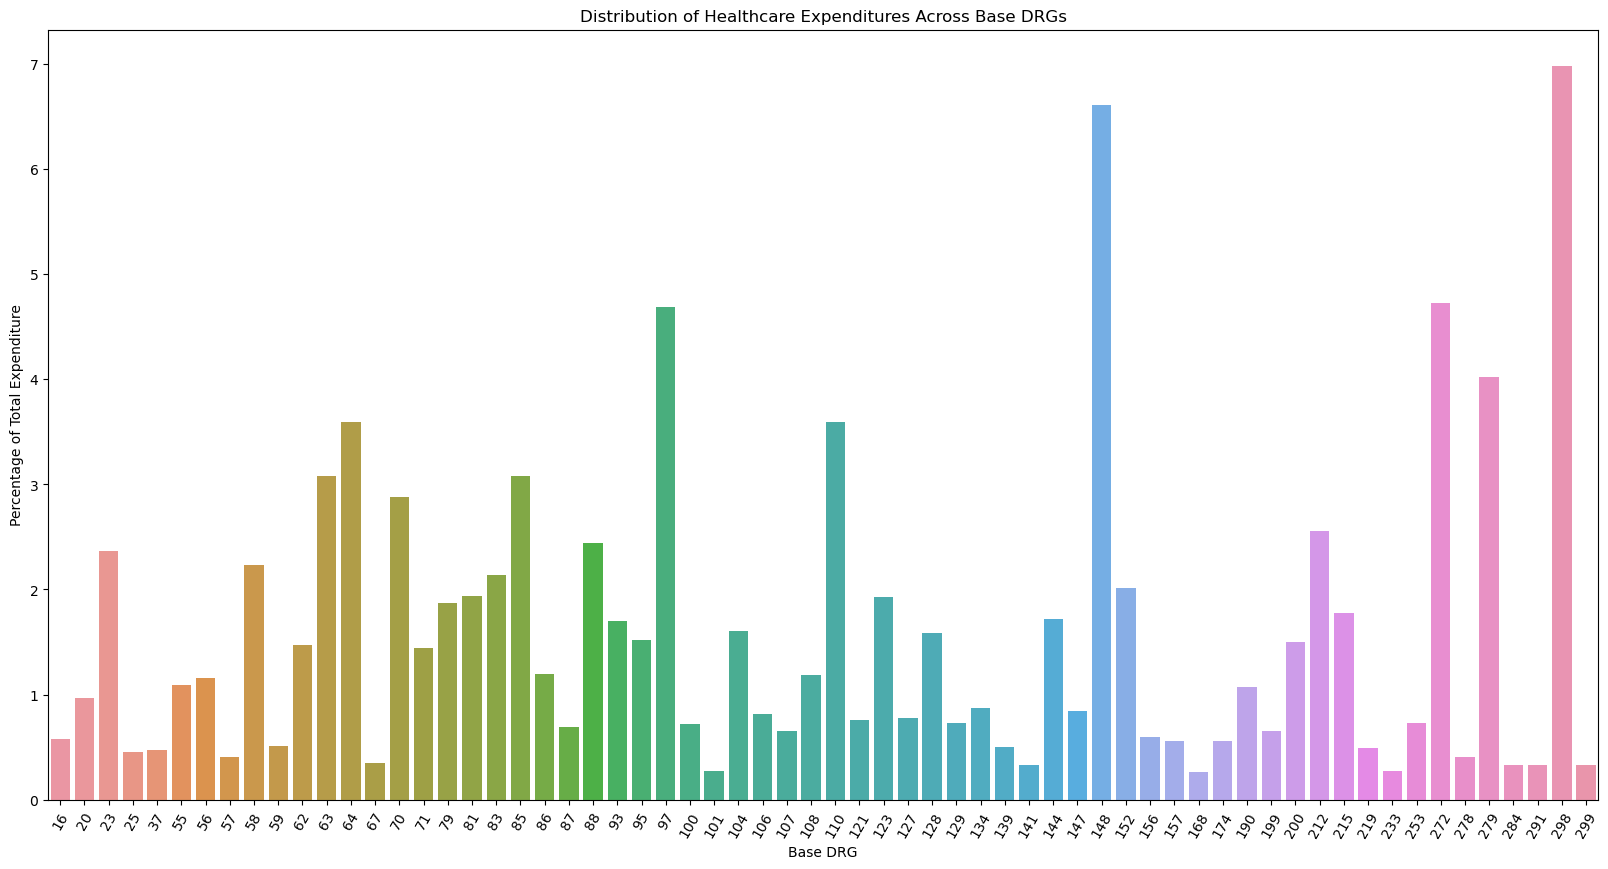

In [112]:
# Group the data by DRG code
grouped_data = data.groupby('base_drg')['quint_avg_payment'].sum()

# Calculate the percentage of total expenditure for each DRG
total_expenditure = grouped_data.sum()
percentage_expenditure = (grouped_data / total_expenditure) * 100

# Reset the index of the percentage_expenditure DataFrame
percentage_expenditure = percentage_expenditure.reset_index()

# Visualize the distribution as horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=percentage_expenditure, x='base_drg', y='quint_avg_payment', ax=ax)
plt.title('Distribution of Healthcare Expenditures Across Base DRGs')
plt.xlabel('Base DRG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.ylabel('Percentage of Total Expenditure')
plt.show()

In [116]:
# Visualize top 5 base drgs by claim
top_5_drgs = percentage_expenditure.sort_values(by='quint_avg_payment', ascending=False).head(5)
print(top_5_drgs)

    base_drg  quint_avg_payment
62       298           6.977354
43       148           6.609189
57       272           4.723729
25        97           4.689339
59       279           4.024396


## Analyze the distribution of expenditures by demographic factors (e.g., age, gender, and region).

## Investigate the relationship between healthcare expenditures and other relevant variables (e.g., length of stay).

## Create summary statistics and visualizations to better understand the dataset and identify patterns, trends, or anomalies.

# Data Visualization

## Create visualizations for healthcare expenditures by demographics (e.g., bar charts, box plots, violin plots).

## Develop visualizations for healthcare expenditures by DRG (e.g., bar charts, heatmap).

## Generate visualizations illustrating the relationship between healthcare expenditures and other relevant variables (e.g., scatter plots, pair plots).

## Utilize visualization best practices to ensure clarity and effectiveness (e.g., appropriate chart types, color schemes, labels, and legends).

# Insights and Findings

## Summarize key insights and findings from the exploratory data analysis and visualizations.

## Discuss potential factors driving the observed patterns, trends, or anomalies.

## Address any limitations of the dataset or analysis that could impact the interpretation of the findings.

# Conclusion

## Recap the project's goal and main findings.

## Discuss the potential implications of the findings for healthcare providers, insurers, or policymakers.

## Suggest possible next steps or future projects that could build upon the current analysis.

# Appendix (optional)

## Include additional charts, tables, or detailed explanations that support the main findings but may not be essential to include in the main report.